Посмотрим на наши данные

In [54]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [55]:
df = pd.read_csv('cian.csv')
df.head()

,Аварийность,Адрес,Безопасность,Время до метро,Газоснабжение,Год постройки,Жилая,Инфраструктура,Кухня,Лифты,...,Построен,Срок сдачи,Строительная серия,Тип дома,Тип перекрытий,Транспорт,Цена,Цена за квадрат,Экология,Этаж
0,Нет,"Московская область, Мытищи, мкр. Ярославский, ...",NaN,⋅ 15 мин. на транспорте,NaN,2012.0,24 м²,NaN,10 м²,"2 пассажирских, 1 грузовой",...,2012.0,NaN,КОПЭ Парус,Панельный,Железобетонные,NaN,6550000.0,136 458,NaN,12 из 25
1,Нет,"Москва, ЗАО, р-н Дорогомилово, Кутузовский про...",NaN,⋅ 13 мин. пешком,Центральное,1957.0,45 м²,NaN,NaN,Нет,...,1934.0,NaN,NaN,Кирпичный,Железобетонные,NaN,26000000.0,406 250,NaN,4 из 7
2,Нет,"Москва, ЦАО, р-н Тверской, 1-й Колобовский пер...",NaN,⋅ 5 мин. пешком,NaN,1917.0,"23,4 м²",NaN,"8,9 м²",Нет,...,1917.0,NaN,NaN,Кирпичный,Деревянные,NaN,18000000.0,450 000,NaN,2 из 3
3,Нет,"Москва, ЗАО, р-н Раменки, Мосфильмовская ул., 8",NaN,⋅ 11 мин. на транспорте,NaN,2011.0,63 м²,NaN,20 м²,Нет,...,NaN,NaN,NaN,Монолитный,Железобетонные,NaN,59900000.0,611 224,NaN,33 из 54
4,Нет,"Москва, ЦАО, р-н Хамовники, Комсомольский прос...",NaN,⋅ 10 мин. пешком,NaN,2014.0,48 м²,NaN,NaN,1 пассажирский,...,NaN,NaN,NaN,Монолитный,NaN,NaN,37900000.0,563 150,NaN,4 из 5


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 29 columns):
Аварийность                2767 non-null object
Адрес                      5992 non-null object
Безопасность               0 non-null float64
Время до метро             5845 non-null object
Газоснабжение              665 non-null object
Год постройки              2720 non-null float64
Жилая                      4743 non-null object
Инфраструктура             0 non-null float64
Кухня                      4703 non-null object
Лифты                      4968 non-null object
Метро                      5986 non-null object
Мусоропровод               1375 non-null object
Название                   5992 non-null object
Общая                      5992 non-null object
Отопление                  2351 non-null object
Отрицательное соседство    0 non-null float64
Парковка                   2722 non-null object
Подъезды                   2436 non-null float64
Положительное соседство    0 non-n

In [57]:
df.describe()

,Безопасность,Год постройки,Инфраструктура,Отрицательное соседство,Подъезды,Положительное соседство,Построен,Транспорт,Цена,Экология
count,0.0,2720.000000,0.0,0.0,2436.000000,0.0,2230.000000,0.0,5.992000e+03,0.0
mean,NaN,1997.523529,NaN,NaN,4.822660,NaN,1998.917937,NaN,1.851656e+07,NaN
std,NaN,25.971570,NaN,NaN,3.879043,NaN,24.183870,NaN,4.131836e+07,NaN
min,NaN,1847.000000,NaN,NaN,1.000000,NaN,1847.000000,NaN,1.200000e+06,NaN
25%,NaN,1979.000000,NaN,NaN,2.000000,NaN,1980.250000,NaN,6.900000e+06,NaN
50%,NaN,2010.000000,NaN,NaN,4.000000,NaN,2011.000000,NaN,1.094500e+07,NaN
75%,NaN,2016.000000,NaN,NaN,6.000000,NaN,2017.000000,NaN,1.976374e+07,NaN
max,NaN,2019.000000,NaN,NaN,24.000000,NaN,2020.000000,NaN,2.600000e+09,NaN


### Удалим все столбцы, в которых отсутсвует более 45% данных

In [58]:
sum(df.isna().sum() / df.shape[0] > 0.45)

18

In [59]:
empty_data = df.isna().sum().sort_values()[-18:]

In [60]:
df.drop(empty_data.index, axis=1, inplace=True)

#### Удалим столбец с названием объявления, так как для обучения модели он не даст полезной информации

In [61]:
df.drop('Название', axis=1, inplace=True)

### Разделим столбец Этаж на два: фактический этаж квартиры и высота всего здания

In [62]:
split_columns = df['Этаж'].str.split(' ', expand=True)

In [63]:
df['Этаж'] = split_columns[0]
df['Этажность здания'] = split_columns[2]

### Очистим столбцы от ненужных символов

In [64]:
df['Жилая'] = df['Жилая'].str.split('\xa0',  expand=True)
df['Кухня'] = df['Кухня'].str.split('\xa0',  expand=True)
df['Общая'] = df['Общая'].str.split('\xa0',  expand=True)

In [65]:
df['Жилая'] = df['Жилая'].str.replace(',', '.').astype(float)
df['Кухня'] = df['Кухня'].str.replace(',', '.').astype(float)
df['Общая'] = df['Общая'].str.replace(' ', '')
df['Общая'] = df['Общая'].str.replace(',', '.').astype(float)

In [66]:
df['Цена за квадрат'] = df['Цена за квадрат'].str.replace(' ', '').astype(float)

In [67]:
df.head()

,Адрес,Время до метро,Жилая,Кухня,Лифты,Метро,Общая,Цена,Цена за квадрат,Этаж,Этажность здания
0,"Московская область, Мытищи, мкр. Ярославский, ...",⋅ 15 мин. на транспорте,24.0,10.0,"2 пассажирских, 1 грузовой",Медведково,48.0,6550000.0,136458.0,12,25
1,"Москва, ЗАО, р-н Дорогомилово, Кутузовский про...",⋅ 13 мин. пешком,45.0,NaN,Нет,Киевская,64.0,26000000.0,406250.0,4,7
2,"Москва, ЦАО, р-н Тверской, 1-й Колобовский пер...",⋅ 5 мин. пешком,23.4,8.9,Нет,Трубная,40.0,18000000.0,450000.0,2,3
3,"Москва, ЗАО, р-н Раменки, Мосфильмовская ул., 8",⋅ 11 мин. на транспорте,63.0,20.0,Нет,Парк Победы,98.0,59900000.0,611224.0,33,54
4,"Москва, ЦАО, р-н Хамовники, Комсомольский прос...",⋅ 10 мин. пешком,48.0,NaN,1 пассажирский,Спортивная,67.3,37900000.0,563150.0,4,5


In [68]:
split_subway = df['Время до метро'].str.split(' ', n=5, expand=True)

In [69]:
df['Время'] = split_subway[3]
df['Способ передвижения'] = split_subway[5]

In [70]:
df = df.drop(['Лифты'], axis=1)

In [111]:
df = df.drop(['Время до метро'], axis=1)

In [71]:
df.head()

,Адрес,Время до метро,Жилая,Кухня,Метро,Общая,Цена,Цена за квадрат,Этаж,Этажность здания,Время,Способ передвижения
0,"Московская область, Мытищи, мкр. Ярославский, ...",⋅ 15 мин. на транспорте,24.0,10.0,Медведково,48.0,6550000.0,136458.0,12,25,15,на транспорте
1,"Москва, ЗАО, р-н Дорогомилово, Кутузовский про...",⋅ 13 мин. пешком,45.0,NaN,Киевская,64.0,26000000.0,406250.0,4,7,13,пешком
2,"Москва, ЦАО, р-н Тверской, 1-й Колобовский пер...",⋅ 5 мин. пешком,23.4,8.9,Трубная,40.0,18000000.0,450000.0,2,3,5,пешком
3,"Москва, ЗАО, р-н Раменки, Мосфильмовская ул., 8",⋅ 11 мин. на транспорте,63.0,20.0,Парк Победы,98.0,59900000.0,611224.0,33,54,11,на транспорте
4,"Москва, ЦАО, р-н Хамовники, Комсомольский прос...",⋅ 10 мин. пешком,48.0,NaN,Спортивная,67.3,37900000.0,563150.0,4,5,10,пешком


In [72]:
df.isna().sum().sort_values()

Адрес                     3
Общая                     3
Цена                      3
Цена за квадрат           3
Этаж                      3
Этажность здания          3
Метро                     9
Время до метро          150
Время                   150
Способ передвижения     195
Жилая                  1252
Кухня                  1292
dtype: int64

Удалим строки, в которых значения таргета неизвестно

In [73]:
df = df[df['Цена'].notna()]

In [74]:
df[df['Время'] == '<1'].shape

(232, 12)

In [75]:
df['Время'] = df['Время'].str.replace('<1', '0').astype(float)

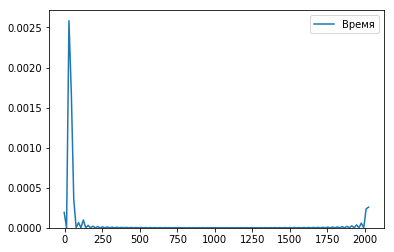

In [76]:
import seaborn as sns

sns.kdeplot(df['Время'])

In [77]:
df = df[df['Время'] < 30]

In [78]:
df['Этаж'] = df['Этаж'].astype(int)
df['Этажность здания'] = df['Этажность здания'].astype(int)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5440 entries, 0 to 5994
Data columns (total 12 columns):
Адрес                  5440 non-null object
Время до метро         5440 non-null object
Жилая                  4287 non-null float64
Кухня                  4270 non-null float64
Метро                  5440 non-null object
Общая                  5440 non-null float64
Цена                   5440 non-null float64
Цена за квадрат        5440 non-null float64
Этаж                   5440 non-null int32
Этажность здания       5440 non-null int32
Время                  5440 non-null float64
Способ передвижения    5440 non-null object
dtypes: float64(6), int32(2), object(4)
memory usage: 510.0+ KB


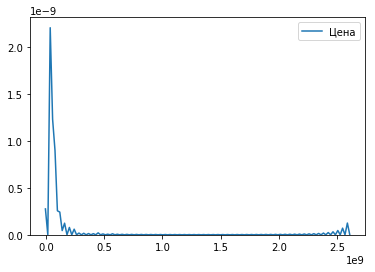

In [80]:
sns.kdeplot(df['Цена'])

In [81]:
df[df['Цена'] > 5*10**8]

,Адрес,Время до метро,Жилая,Кухня,Метро,Общая,Цена,Цена за квадрат,Этаж,Этажность здания,Время,Способ передвижения
54,"Москва, ЦАО, р-н Тверской, ул. Охотный Ряд, 2",⋅ 2 мин. пешком,NaN,NaN,Охотный ряд,360.0,5.603952e+08,1556653.0,9,11,2.0,пешком
2245,"Москва, ЦАО, р-н Пресненский, наб. Пресненская...",⋅ 5 мин. пешком,NaN,NaN,Международная,2181.0,2.600000e+09,1192114.0,95,97,5.0,пешком


In [82]:
df[df['Цена'] < 2.5*10**6]

,Адрес,Время до метро,Жилая,Кухня,Метро,Общая,Цена,Цена за квадрат,Этаж,Этажность здания,Время,Способ передвижения
2778,"Московская область, Лыткарино, 7-й квартал, 5Б",⋅ 20 мин. на транспорте,NaN,3.0,Котельники,18.00,2350000.0,130556.0,3,5,20.0,на транспорте
3184,"Московская область, Дмитровский городской окру...",⋅ <1 мин. на транспорте,15.2,6.8,Тимирязевская,30.10,2050000.0,68106.0,2,5,0.0,на транспорте
3620,"Москва, ВАО, р-н Перово, 1-я Владимирская ул., 20",⋅ 9 мин. пешком,NaN,NaN,Перово,20.00,2490000.0,124500.0,2,3,9.0,пешком
4128,"Московская область, Ленинский городской округ,...",⋅ 15 мин. на транспорте,15.0,6.0,Бульвар Дмитрия Донского,31.64,2300000.0,72693.0,2,4,15.0,на транспорте
4547,"Московская область, Ленинский городской округ,...",⋅ 16 мин. на транспорте,20.3,6.4,Красногвардейская,30.48,2302000.0,75525.0,4,4,16.0,на транспорте
4872,"Московская область, Ивантеевка, Заводская ул.",⋅ 26 мин. на транспорте,14.7,13.4,Медведково,39.00,2238800.0,57405.0,9,19,26.0,на транспорте
5198,"Московская область, Богородский городской окру...",⋅ 25 мин. на транспорте,12.0,7.0,Партизанская,26.10,2153250.0,82500.0,7,17,25.0,на транспорте
5350,"Московская область, Пушкино, мкр. Новое Пушкин...",⋅ 29 мин. на транспорте,11.4,6.0,Медведково,25.50,2455700.0,96302.0,5,17,29.0,на транспорте
5634,"Московская область, Люберцы городской округ, К...",⋅ 18 мин. на транспорте,NaN,NaN,Выхино,21.00,2430000.0,115714.0,2,17,18.0,на транспорте
5699,"Московская область, Ивантеевка, Задорожная ул.",⋅ 26 мин. на транспорте,15.0,11.0,Медведково,42.00,2436000.0,58000.0,5,17,26.0,на транспорте


In [83]:
df = df[df['Цена'] < 5*10**8]
df = df[df['Цена'] > 2.5*10**6]

In [84]:
from geopy.geocoders import Yandex

In [85]:
geolocator = Yandex(api_key='9169aca7-b00e-4539-ab1d-e7bb613cfee2')

In [91]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=0.5)

In [92]:
df['Город и метро'] = 'Москва, метро ' + df['Метро']
df['Город и метро'].head()

0     Москва, метро Медведково
1       Москва, метро Киевская
2        Москва, метро Трубная
3    Москва, метро Парк Победы
4     Москва, метро Спортивная
Name: Город и метро, dtype: object

In [95]:
geocode('Москва, метро Баррикадная', timeout=10)

Location(метро Баррикадная, Таганско-Краснопресненская линия, Москва, Россия, (55.760818, 37.58128, 0.0))

In [96]:
df['Город и метро'] = df['Город и метро'].apply(geocode, timeout=10)
df['Координаты метро'] = df['Город и метро'].apply(lambda loc: tuple(loc.point) if loc else None)

In [97]:
df['Адрес'] = df['Адрес'].apply(geocode, timeout=10)

In [98]:
df['Координаты дома'] = df['Адрес'].apply(lambda loc: tuple(loc.point) if loc else None)

In [100]:
df['Широта дома'] = df['Координаты дома'].apply(lambda x: x[0])
df['Долгота дома'] = df['Координаты дома'].apply(lambda x: x[1])

In [102]:
df['Широта метро'] = df['Координаты метро'].apply(lambda x: x[0])
df['Долгота долгота'] = df['Координаты метро'].apply(lambda x: x[1])

In [108]:
df = df.drop(['Координаты метро', 'Координаты дома', 'Город и метро'], axis=1)

In [109]:
df.head()

,Адрес,Время до метро,Жилая,Кухня,Метро,Общая,Цена,Цена за квадрат,Этаж,Этажность здания,Время,Способ передвижения,Широта дома,Долгота дома,Широта метро,Долгота долгота
0,"(Юбилейная улица, 16, Мытищи, Московская облас...",⋅ 15 мин. на транспорте,24.0,10.0,Медведково,48.0,6550000.0,136458.0,12,25,15.0,на транспорте,55.913162,37.713063,55.887473,37.661527
1,"(Кутузовский проспект, 4/2, Москва, Россия, (5...",⋅ 13 мин. пешком,45.0,NaN,Киевская,64.0,26000000.0,406250.0,4,7,13.0,пешком,55.750727,37.562272,55.743588,37.565587
2,"(1-й Колобовский переулок, 13/14с3, Москва, Ро...",⋅ 5 мин. пешком,23.4,8.9,Трубная,40.0,18000000.0,450000.0,2,3,5.0,пешком,55.769216,37.617411,55.767939,37.621884
3,"(Мосфильмовская улица, 8, Москва, Россия, (55....",⋅ 11 мин. на транспорте,63.0,20.0,Парк Победы,98.0,59900000.0,611224.0,33,54,11.0,на транспорте,55.723257,37.527660,55.736934,37.516009
4,"(Комсомольский проспект, 42с2, Москва, Россия,...",⋅ 10 мин. пешком,48.0,NaN,Спортивная,67.3,37900000.0,563150.0,4,5,10.0,пешком,55.721731,37.572899,55.723247,37.564105


In [112]:
df.to_csv('clean_data.csv', index=False)